# Подключение библиотек

In [29]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import time
import pandas as pd
from IPython.display import Image
import warnings

# Функция Растригина

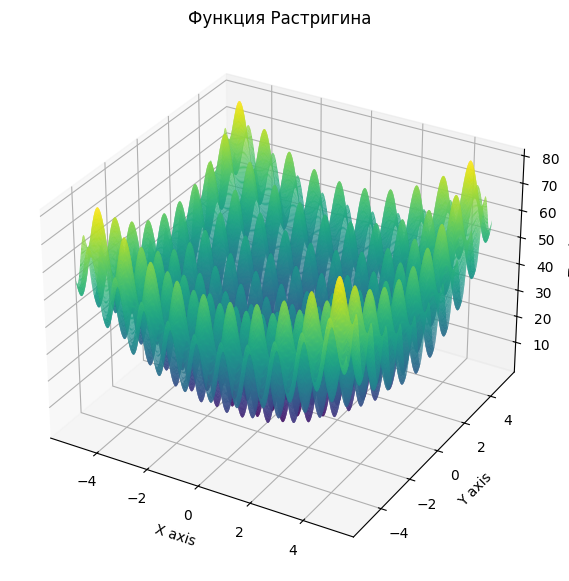

In [5]:
dimensions = 3  # размерность пространства
A = 10
def rastrigin(X):
    A = 10
    n = len(X)
    return A * n + sum([(x**2 - A * np.cos(2 * np.pi * x)) for x in X])
    
def plot_rastrigin():
    x = np.linspace(-5.12, 5.12, 400)
    y = np.linspace(-5.12, 5.12, 400)
    X, Y = np.meshgrid(x, y)
    Z = rastrigin([X, Y])

    fig = plt.figure(figsize=(12, 7))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.set_title('Функция Растригина')

    plt.show()

plot_rastrigin()

# Алгоритм Ньютона

In [6]:
def optimize_newton(dimensions, num_runs=100):
    results = []
    for _ in range(num_runs):
        x0 = np.random.rand(dimensions) * 10 - 5  # начальное приближение
        res = minimize(rastrigin, x0, method='Newton-CG', jac=lambda x: 2*x + A * np.sin(2 * np.pi * x) * 2 * np.pi)
        results.append(res.fun)
    return results
    
start_time_0 = time.time()    
newton_results = optimize_newton(dimensions)
end_time_0 = time.time()    

name_0 = 'Алгоритм Ньютона'
mean_0 = np.mean(newton_results)
var_0 = np.var(newton_results)
time_estimate_0 = end_time_0 - start_time_0 

print(f"\n{name_0}")
print("Математическое ожидание:", mean_0)
print("Дисперсия:", var_0)
print(f"Время реализации алгоритма: {time_estimate_0} секунд")


Алгоритм Ньютона
Математическое ожидание: 26.352312765466618
Дисперсия: 225.4166790795338
Время реализации алгоритма: 0.17937111854553223 секунд


## Визуализация алгоритма оптимизации Ньютона

Optimization terminated successfully.
         Current function value: 0.994959
         Iterations: 7
         Function evaluations: 14
         Gradient evaluations: 23
         Hessian evaluations: 0


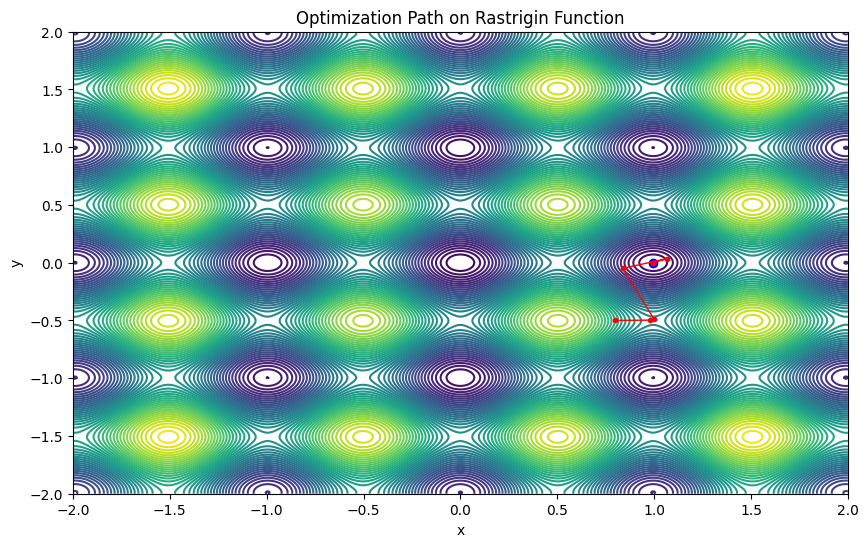

In [4]:
# Градиент функции Растригина
def rastrigin_grad(x):
    return 2 * x + 20 * np.pi * np.sin(2 * np.pi * x)

# Начальная точка
x0 = np.array([0.8, -0.5])

# Создаем сетку значений для визуализации
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)
Z = rastrigin([X, Y])

# Визуализация функции Растригина
plt.figure(figsize=(10, 6))
plt.contour(X, Y, Z, levels=50, cmap='viridis')

# Функция для сохранения истории оптимизации
history = [x0]
def callback(xk):
    history.append(xk)

# Оптимизация
result = minimize(rastrigin, x0, method='Newton-CG', jac=rastrigin_grad, callback=callback, options={'disp': True})

# Отображаем траекторию оптимизации
history = np.array(history)
plt.plot(history[:, 0], history[:, 1], 'ro-', markersize=3, linewidth=1)
plt.scatter(*result.x, color='blue') # Конечная точка
plt.title('Optimization Path on Rastrigin Function')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Генетический алгоритм

In [7]:
from geneticalgorithm import geneticalgorithm as ga

## Оптимизация с использованием генетического алгоритма

 The best solution found:                                                                           
 [ 0.00292976 -0.00055346  0.01797029]

 Objective function:
 0.06576297433313627


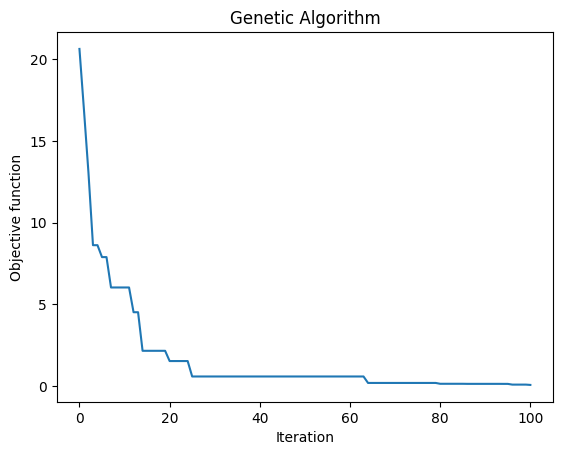


Генетический алгоритм
Математическое ожидание: 0.06576297433313627
Дисперсия: 0.0
Время реализации алгоритма: 3.02646541595459 секунд


In [8]:
def optimize_genetic(dimensions, num_runs=3):
    results = []
    varbound = np.array([[-5,5]]*dimensions)  # границы переменных

    def fitness(X):
        return rastrigin(X)
        
    algorithm_param = {'max_num_iteration': 100,
                        'population_size': 100,
                        'mutation_probability': 0.1,
                        'elit_ratio': 0.01,
                        'crossover_probability': 0.5,
                        'parents_portion': 0.3,
                        'crossover_type': 'uniform',
                        'max_iteration_without_improv': None
                        }
    
    model = ga(function=fitness, dimension=dimensions, variable_type='real', variable_boundaries=varbound, algorithm_parameters=algorithm_param)
    model.run()
    results.append(model.best_function) 
        
    return results
    
start_time_1 = time.time()    
genetic_results = optimize_genetic(dimensions)
end_time_1 = time.time()

name_1 = 'Генетический алгоритм'
mean_1 = np.mean(genetic_results)
var_1 = np.var(genetic_results)
time_estimate_1 = end_time_1 - start_time_1

print(f"\n{name_1}")
print("Математическое ожидание:", mean_1)
print("Дисперсия:", var_1)
print(f"Время реализации алгоритма: {time_estimate_1} секунд")

# Алгоритм роя частиц

In [9]:
from pyswarm import pso
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
from pyswarms.utils.plotters import (plot_cost_history, plot_contour, plot_surface)
from pyswarms.utils.plotters.formatters import Mesher
from pyswarms.utils.plotters.formatters import Designer

2023-11-16 11:09:04,204 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|100/100, best_cost=0.000467
2023-11-16 11:09:04,371 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0004669112955895116, best pos: [-0.00043708  0.00147053]


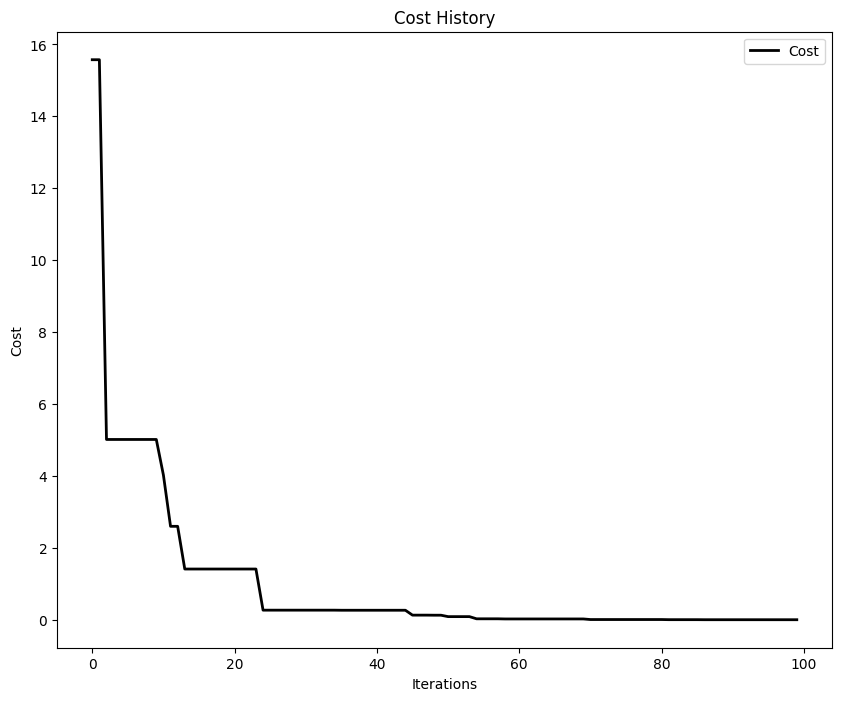


Алгоритм роя частиц
Математическое ожидание: 0.0005167241172104123
Дисперсия: 0.0004669112955895116
Время реализации алгоритма: 0.1847846508026123 секунд


In [10]:
# Create bounds
max_bound = 5.12 * np.ones(2)
min_bound = - max_bound
bounds = (min_bound, max_bound)

# Initialize swarm
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}

# Call instance of PSO with bounds argument
start_time_2 = time.time() 
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options, bounds=bounds)

# Perform optimization
cost, pos = optimizer.optimize(fx.rastrigin, iters=100)
end_time_2 = time.time()

plot_cost_history(cost_history=optimizer.cost_history)
plt.show()

mean_2 = np.mean(pos)
var_2 = cost
name_2 = 'Алгоритм роя частиц'
time_estimate_2 = end_time_2 - start_time_2

print(f"\n{name_2}")
print("Математическое ожидание:", mean_2)
print("Дисперсия:", var_2)
print(f"Время реализации алгоритма: {time_estimate_2} секунд")

## Визуализация итераций алгоритма Роя Частиц

In [35]:
%%capture
# Make animation

# Initialize mesher with sphere function
m = Mesher(func=fx.rastrigin)
animation = plot_contour(pos_history=optimizer.pos_history,
                         mesher=m,
                         mark=(0, 0))

In [42]:
# Enables us to view it in a Jupyter notebook
animation.save('plot0.gif', writer='imagemagick', fps=10)
Image(url='plot0.gif')

2023-11-15 19:10:47,052 - matplotlib.animation - WARNING - MovieWriter imagemagick unavailable; using Pillow instead.
2023-11-15 19:10:47,053 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.PillowWriter'>


# Пчелиный алгоритм

In [11]:
from bees_algorithm import BeesAlgorithm

In [12]:
max_bound = 5.12 * np.ones(2)
min_bound = - max_bound
search_boundaries = ([x for x in min_bound for _ in range(2)], [x for x in max_bound  for _ in range(2)])

alg = BeesAlgorithm(rastrigin,search_boundaries[0],search_boundaries[1])

start_time_3 = time.time()
alg.performFullOptimisation(max_iteration=100)
end_time_3 = time.time()

best = alg.best_solution

name_3 = 'Пчелиный алгоритм'
mean_3 = np.mean(abs(best.values))
var_3 = np.var(abs(best.values))
time_estimate_3 = end_time_3 - start_time_3

print(f"\n{name_3}")
print("Математическое ожидание:", mean_3)
print("Дисперсия:", var_3)
print(f"Время реализации алгоритма: {time_estimate_3} секунд")


Пчелиный алгоритм
Математическое ожидание: 4.5229941281768635
Дисперсия: 2.0841059719937144e-12
Время реализации алгоритма: 0.3199279308319092 секунд


## Визуализация пчелинного алгоритма

[-5.12, -5.12]
 


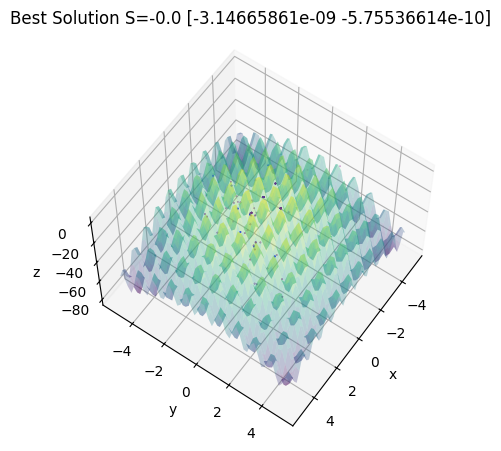

In [47]:
import benchmark_functions as bf
import warnings
import builtins

warnings.filterwarnings('ignore')

class SuppressInput:
    def __enter__(self):
        self.original_input = builtins.input
        builtins.input = self.mock_input
        return self

    def __exit__(self, exc_type, exc_val, exc_tb):
        builtins.input = self.original_input

    def mock_input(self, prompt=""):
        return "заданное значение"  # Вы можете вернуть любое значение, которое вам нужно
try:
    # Использование:
    with SuppressInput():
        # В этом блоке любые вызовы input() вернут "заданное значение"
        # Ваш код
        b_func = bf.Rastrigin(opposite=True)
        suggested_lowerbound, suggested_upperbound = b_func.suggested_bounds()
        schwefel_bees_parameters = {'ns':0, 'nb':15, 'ne':1, 'nrb':5, 'nre':30, 'stlim':10}

        alg = BeesAlgorithm(b_func, suggested_lowerbound, suggested_upperbound, **schwefel_bees_parameters)

        alg.visualize_iteration_steps()
except KeyboardInterrupt:
    print(" ")

# Сравнение результатов работы алгоритмов

In [13]:
data = {
    'Алгоритм': [name_0, name_1, name_2, name_3],
    'Дисперсия': [var_0, var_1, var_2, var_3],
    'Математическое ожидание': [mean_0, mean_1, mean_2, mean_3],
    'Время реализации алгоритма (сек)': [time_estimate_0, time_estimate_1, time_estimate_2, time_estimate_3]
}

table = pd.DataFrame(data)
print('Результаты работы алгоритмов:')
table.sort_values(by = 'Дисперсия', ascending=True)

Результаты работы алгоритмов:


,Алгоритм,Дисперсия,Математическое ожидание,Время реализации алгоритма (сек)
1,Генетический алгоритм,0.000000e+00,0.065763,3.026465
3,Пчелиный алгоритм,2.084106e-12,4.522994,0.319928
2,Алгоритм роя частиц,4.669113e-04,0.000517,0.184785
0,Алгоритм Ньютона,2.254167e+02,26.352313,0.179371


## Визуализация сравнения

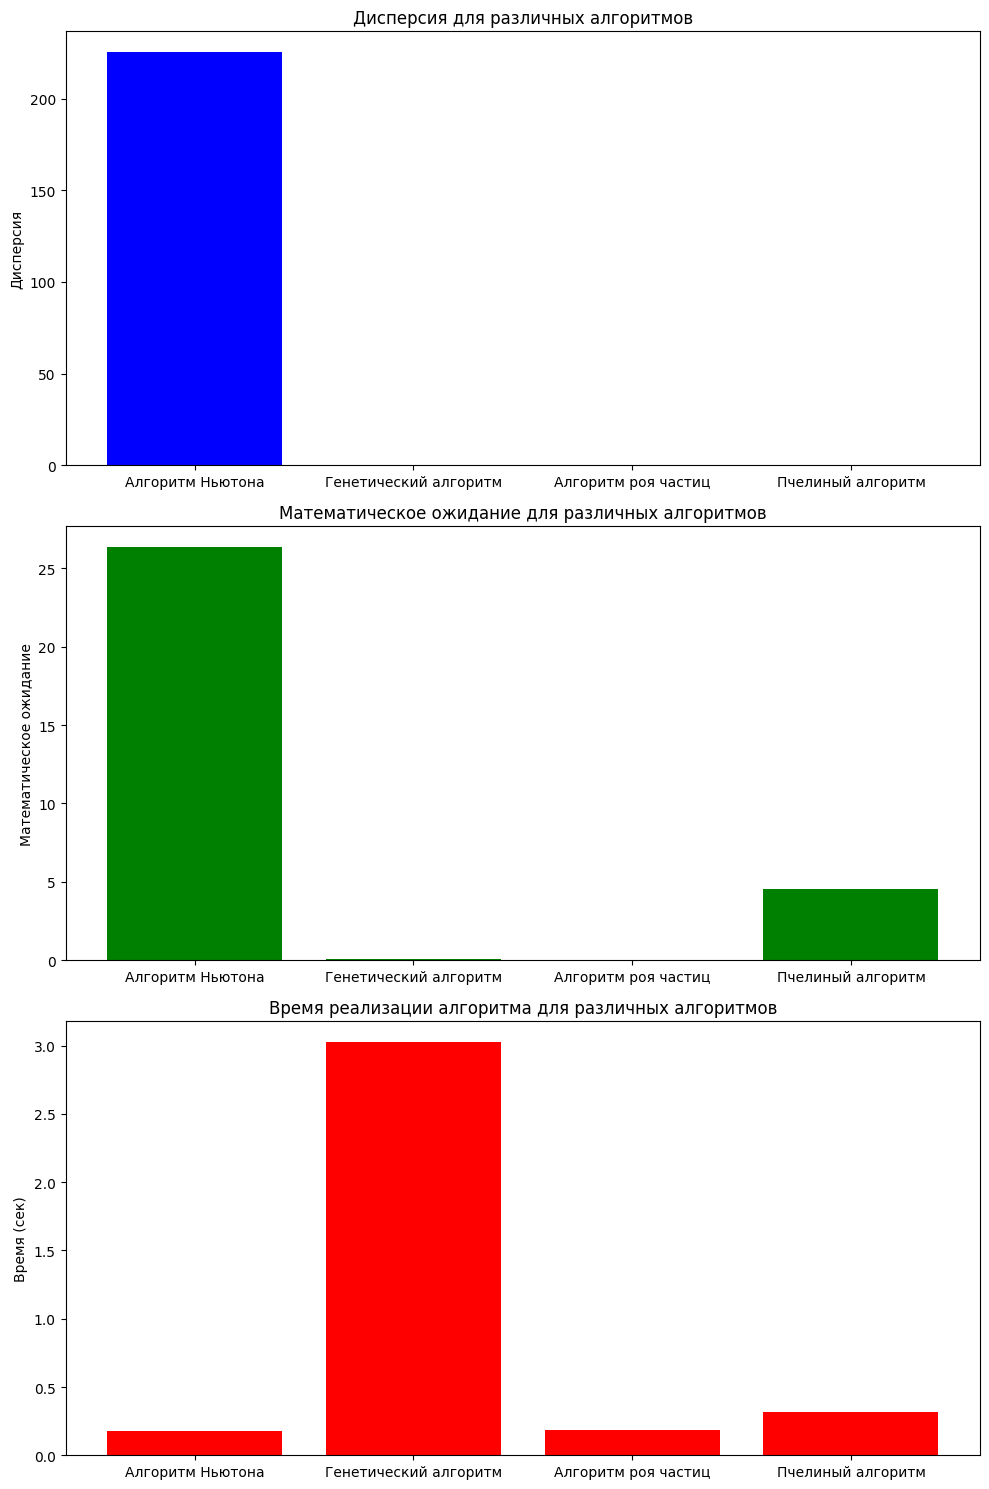

In [14]:
# Визуализация данных
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# График дисперсии
axs[0].bar(table['Алгоритм'], table['Дисперсия'], color='blue')
axs[0].set_title('Дисперсия для различных алгоритмов')
axs[0].set_ylabel('Дисперсия')

# График математического ожидания
axs[1].bar(table['Алгоритм'], table['Математическое ожидание'], color='green')
axs[1].set_title('Математическое ожидание для различных алгоритмов')
axs[1].set_ylabel('Математическое ожидание')

# График времени реализации
axs[2].bar(table['Алгоритм'], table['Время реализации алгоритма (сек)'], color='red')
axs[2].set_title('Время реализации алгоритма для различных алгоритмов')
axs[2].set_ylabel('Время (сек)')

plt.tight_layout()
plt.show()

# Поиск оптимальных значений параметров для SVM, knn, RF-классификаторов с применением эволюционного алгоритма оптимизации.

In [59]:
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Continuous, Categorical, Integer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
from sklearn_genetic.plots import plot_fitness_evolution
from sklearn.svm import SVC
from sklearn_genetic import GAFeatureSelectionCV
from sklearn_genetic.plots import plot_search_space

## Загрузка данных

In [48]:
df = pd.read_csv('data/hayes-roth.data', header = None)
df.columns = ['name', 'hobby', 'age', 'educational level', 'marital status', 'class']

X = df.drop(columns = ['class', 'name'], axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

df

,name,hobby,age,educational level,marital status,class
0,92,2,1,1,2,1
1,10,2,1,3,2,2
2,83,3,1,4,1,3
3,61,2,4,2,2,3
4,107,1,1,3,4,3
...,...,...,...,...,...,...
127,44,1,1,4,3,3
128,40,2,1,2,1,1
129,90,1,2,1,2,2
130,21,1,2,2,1,2


## SVM (Support Vector Machines)

In [56]:
clf = SVC(gamma='auto')

param_grid = {
    'C': Continuous(0.1, 100, distribution='log-uniform'),  # Параметр регуляризации
    'kernel': Categorical(['linear', 'poly', 'rbf', 'sigmoid']),  # Тип ядра
    'gamma': Continuous(0.001, 1, distribution='log-uniform'),  # Коэффициент для ядер 'rbf', 'poly' и 'sigmoid'
    'degree': Integer(2, 5)  # Степень полиномиального ядра
}

cv = StratifiedKFold(n_splits=3, shuffle=True)

evolved_estimator = GASearchCV(estimator=clf,
                               cv=cv,
                               scoring='accuracy',
                               population_size=20,
                               generations=20,
                               param_grid=param_grid,
                               n_jobs=-1,
                               verbose=True,
                               keep_top_k=4)

# Train and select the features
evolved_estimator.fit(X_train, y_train)
# Best parameters found
print(evolved_estimator.best_params_)
# Use the model fitted with the best parameters
y_predict_ga = evolved_estimator.predict(X_test)
print(accuracy_score(y_test, y_predict_ga))

# Saved metadata for further analysis
print("Stats achieved in each generation: ", evolved_estimator.history)
print("Best k solutions: ", evolved_estimator.hof)

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	20    	0.561905	0.163743   	0.87619    	0.409524   
1  	40    	0.716667	0.12663    	0.885714   	0.409524   
2  	40    	0.761905	0.105839   	0.885714   	0.504762   
3  	40    	0.80381 	0.0664896  	0.885714   	0.619048   
4  	40    	0.823333	0.0676442  	0.885714   	0.666667   
5  	40    	0.853333	0.0191426  	0.885714   	0.819048   
6  	40    	0.860952	0.0232115  	0.895238   	0.819048   
7  	40    	0.86619 	0.0196281  	0.895238   	0.819048   
8  	40    	0.87381 	0.0150208  	0.895238   	0.828571   
9  	40    	0.871905	0.0340035  	0.895238   	0.733333   
10 	40    	0.875714	0.014592   	0.895238   	0.847619   
11 	40    	0.884762	0.00947607 	0.895238   	0.857143   
12 	40    	0.864286	0.0593903  	0.895238   	0.638095   
13 	40    	0.877619	0.0287731  	0.895238   	0.780952   
14 	40    	0.87381 	0.0192548  	0.895238   	0.828571   
15 	40    	0.870952	0.0265089  	0.895238   	0.809524   
16 	40    	0.88    	0.0121964  	0.895238   	0.85

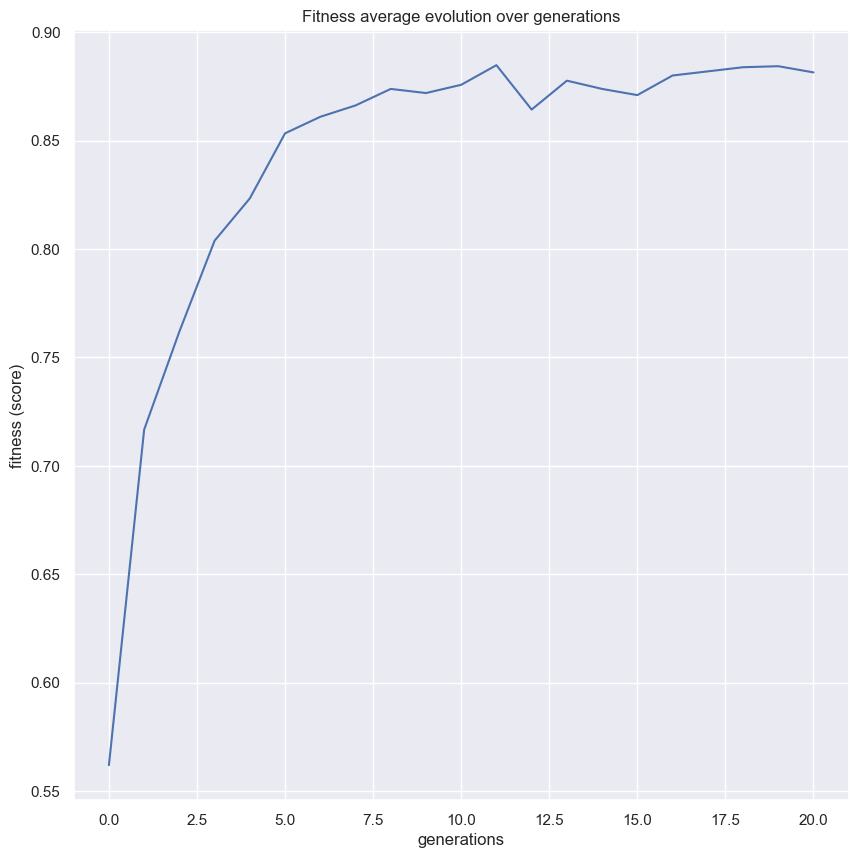

In [57]:
warnings.filterwarnings('ignore')

plot_fitness_evolution(evolved_estimator)
plt.show()

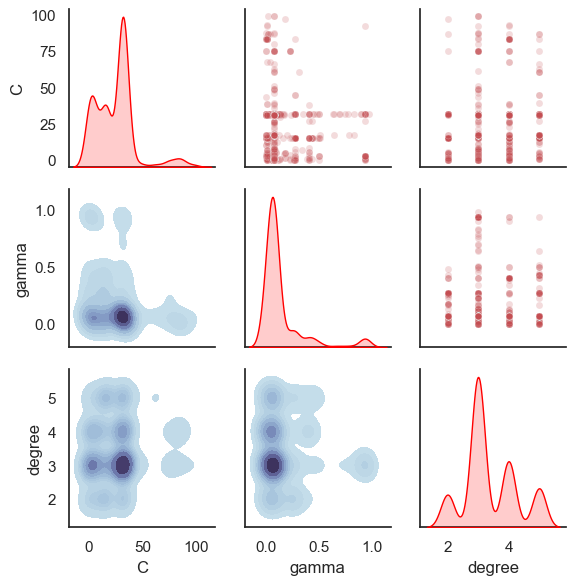

In [61]:
warnings.filterwarnings('ignore')

plot_search_space(evolved_estimator, features=['C', 'gamma', 'degree'])
plt.show()

## RF (Random Forest)

In [63]:
clf = RandomForestClassifier()

param_grid = {'min_weight_fraction_leaf': Continuous(0.01, 0.5, distribution='log-uniform'),
              'bootstrap': Categorical([True, False]),
              'max_depth': Integer(2, 30),
              'max_leaf_nodes': Integer(2, 35),
              'n_estimators': Integer(100, 300)}

cv = StratifiedKFold(n_splits=3, shuffle=True)

evolved_estimator = GASearchCV(estimator=clf,
                               cv=cv,
                               scoring='accuracy',
                               population_size=20,
                               generations=20,
                               param_grid=param_grid,
                               n_jobs=-1,
                               verbose=True,
                               keep_top_k=4)

# Train and select the features
evolved_estimator.fit(X_train, y_train)
# Best parameters found
print(evolved_estimator.best_params_)
# Use the model fitted with the best parameters
y_predict_ga = evolved_estimator.predict(X_test)
print(accuracy_score(y_test, y_predict_ga))

# Saved metadata for further analysis
print("Stats achieved in each generation: ", evolved_estimator.history)
print("Best k solutions: ", evolved_estimator.hof)

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	20    	0.656667	0.132838   	0.895238   	0.47619    
1  	40    	0.758095	0.123163   	0.895238   	0.495238   
2  	40    	0.854286	0.0284282  	0.895238   	0.8        
3  	40    	0.875714	0.0196281  	0.895238   	0.828571   
4  	40    	0.88    	0.0151785  	0.904762   	0.847619   
5  	40    	0.890952	0.012945   	0.914286   	0.866667   
6  	40    	0.882381	0.0186324  	0.914286   	0.828571   
7  	40    	0.878095	0.0214233  	0.914286   	0.828571   
8  	40    	0.877619	0.0256038  	0.914286   	0.828571   
9  	40    	0.88    	0.0142539  	0.914286   	0.857143   
10 	40    	0.88    	0.0186628  	0.914286   	0.819048   
11 	40    	0.880952	0.00928266 	0.895238   	0.857143   
12 	40    	0.875714	0.0196281  	0.904762   	0.819048   
13 	40    	0.880952	0.0122336  	0.895238   	0.847619   
14 	40    	0.872381	0.0235991  	0.895238   	0.809524   
15 	40    	0.871429	0.0194015  	0.895238   	0.809524   
16 	40    	0.871429	0.0132993  	0.895238   	0.83

In [64]:
# Best parameters found
print(evolved_estimator.best_params_)
# Use the model fitted with the best parameters
y_predict_ga = evolved_estimator.predict(X_test)
print(accuracy_score(y_test, y_predict_ga))

{'min_weight_fraction_leaf': 0.014631276127749395, 'bootstrap': False, 'max_depth': 21, 'max_leaf_nodes': 17, 'n_estimators': 132}
0.7407407407407407


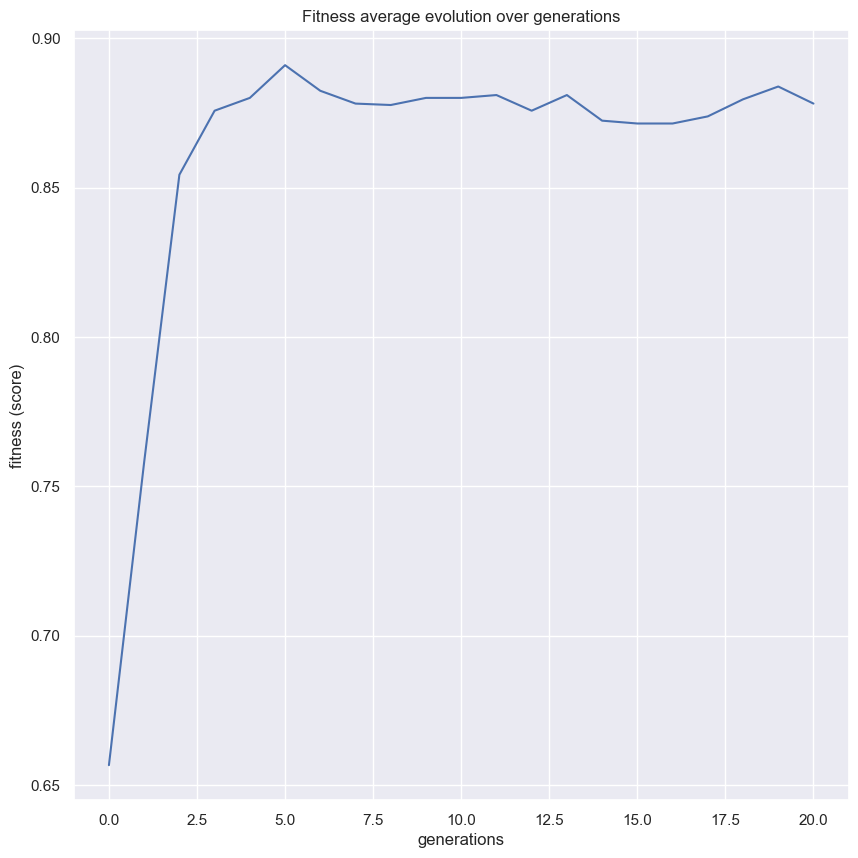

In [65]:
warnings.filterwarnings('ignore')

plot_fitness_evolution(evolved_estimator)
plt.show()

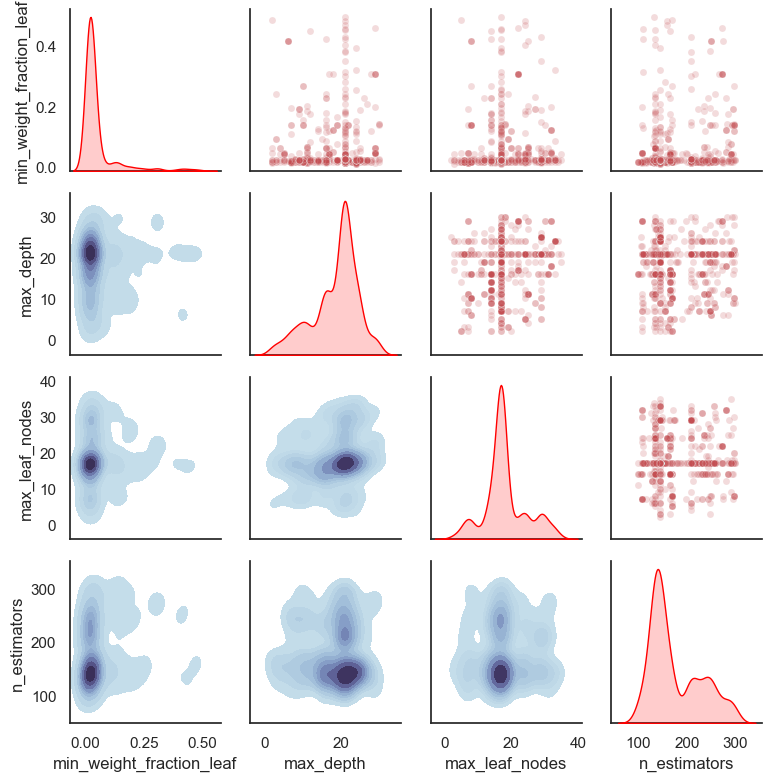

In [66]:
warnings.filterwarnings('ignore')

plot_search_space(evolved_estimator, features=['min_weight_fraction_leaf', 'max_depth', 'max_leaf_nodes', 'n_estimators'])
plt.show()

## k-NN (K-Nearest Neighbors) 

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
clf = KNeighborsClassifier()

param_grid = {
    'n_neighbors': Integer(3, 15),  # Количество соседей
    'weights': Categorical(['uniform', 'distance']),  # Тип весов (одинаковые или в зависимости от расстояния)
    'metric': Categorical(['euclidean', 'manhattan'])  # Метрика для измерения расстояния
}

cv = StratifiedKFold(n_splits=3, shuffle=True)

evolved_estimator = GASearchCV(estimator=clf,
                               cv=cv,
                               scoring='accuracy',
                               population_size=20,
                               generations=20,
                               param_grid=param_grid,
                               n_jobs=-1,
                               verbose=True,
                               keep_top_k=4)

# Train and select the features
evolved_estimator.fit(X_train, y_train)
# Best parameters found
print(evolved_estimator.best_params_)
# Use the model fitted with the best parameters
y_predict_ga = evolved_estimator.predict(X_test)
print(accuracy_score(y_test, y_predict_ga))

# Saved metadata for further analysis
print("Stats achieved in each generation: ", evolved_estimator.history)
print("Best k solutions: ", evolved_estimator.hof)

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	20    	0.579524	0.11552    	0.761905   	0.371429   
1  	40    	0.691905	0.0495124  	0.8        	0.609524   
2  	40    	0.722381	0.0423006  	0.8        	0.6        
3  	40    	0.746667	0.0292615  	0.790476   	0.657143   
4  	40    	0.747619	0.0294315  	0.790476   	0.67619    
5  	40    	0.750952	0.0259557  	0.780952   	0.695238   
6  	40    	0.750476	0.0299054  	0.780952   	0.67619    
7  	40    	0.76    	0.0234448  	0.780952   	0.704762   
8  	40    	0.764762	0.0219461  	0.780952   	0.714286   
9  	40    	0.759524	0.031569   	0.780952   	0.695238   
10 	40    	0.759524	0.0282321  	0.8        	0.704762   
11 	40    	0.748095	0.0350542  	0.780952   	0.67619    
12 	40    	0.747143	0.0289616  	0.780952   	0.695238   
13 	40    	0.74619 	0.0400991  	0.780952   	0.666667   
14 	40    	0.759524	0.0262337  	0.8        	0.695238   
15 	40    	0.74    	0.0756589  	0.790476   	0.466667   
16 	40    	0.75    	0.0589304  	0.8        	0.53

In [69]:
# Best parameters found
print(evolved_estimator.best_params_)
# Use the model fitted with the best parameters
y_predict_ga = evolved_estimator.predict(X_test)
print(accuracy_score(y_test, y_predict_ga))

{'n_neighbors': 6, 'weights': 'distance', 'metric': 'manhattan'}
0.6296296296296297


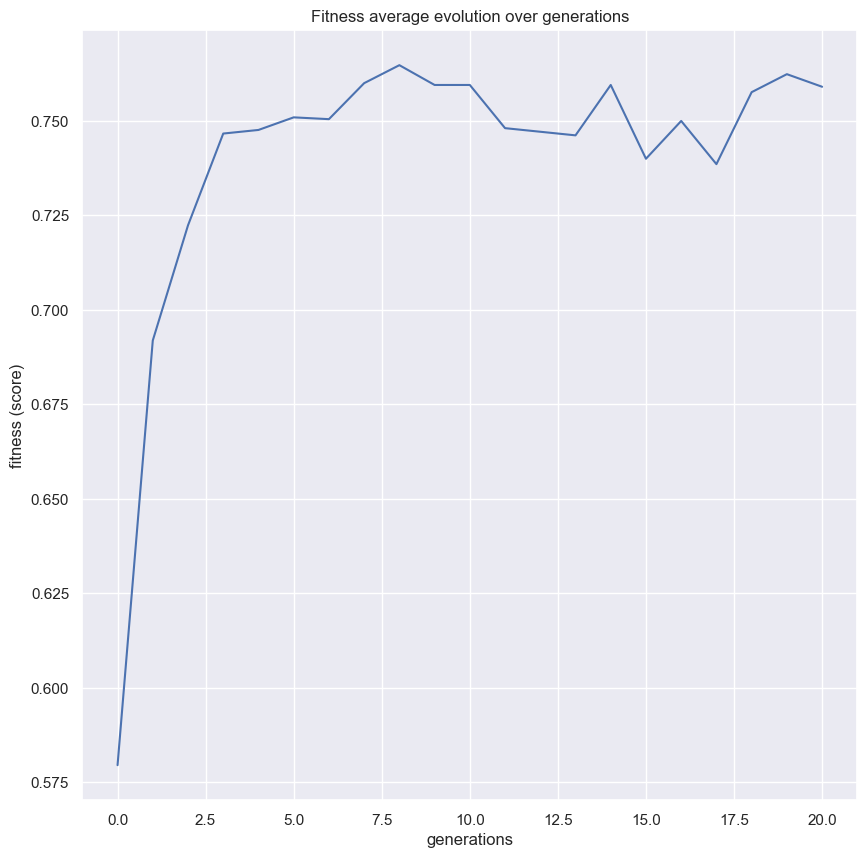

In [70]:
warnings.filterwarnings('ignore')

plot_fitness_evolution(evolved_estimator)
plt.show()

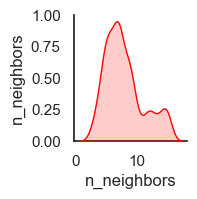

In [71]:
warnings.filterwarnings('ignore')

plot_search_space(evolved_estimator, features=['n_neighbors'])
plt.show()